# Olympic Data Analysis

# Introduction

This notebook presents an analysis of the Olympic medals and swimming performance data for the Paris 2024 Olympics. The main goals include:

1. Examining and cleaning the medals dataset.
2. Visualizing the medal distribution by type and country.
3. Evaluating swimming results, with a focus on performance metrics and medal tallies.

For visualization and insights, tools such as Seaborn and Plotly are employed.

## 1. Import Libraries

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## 2. Load Datasets

In [2]:
df_medals = pd.read_csv("/kaggle/input/paris-2024-olympic-summer-games/medals.csv")
df_total_medals = pd.read_csv("/kaggle/input/paris-2024-olympic-summer-games/medals_total.csv")
df_swimming = pd.read_csv("/kaggle/input/paris-2024-olympic-summer-games/results/Swimming.csv")

## 3. Explore Medals Data

In [3]:
# Display the first few rows of the medals dataset
df_medals.head(5)

,medal_type,medal_code,medal_date,name,gender,discipline,event,event_type,url_event,code,country_code,country,country_long
0,Gold Medal,1.0,2024-07-27,Remco EVENEPOEL,M,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1903136,BEL,Belgium,Belgium
1,Silver Medal,2.0,2024-07-27,Filippo GANNA,M,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1923520,ITA,Italy,Italy
2,Bronze Medal,3.0,2024-07-27,Wout van AERT,M,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1903147,BEL,Belgium,Belgium
3,Gold Medal,1.0,2024-07-27,Grace BROWN,W,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1940173,AUS,Australia,Australia
4,Silver Medal,2.0,2024-07-27,Anna HENDERSON,W,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1912525,GBR,Great Britain,Great Britain


In [4]:
# Check data types of columns
df_medals.dtypes

medal_type       object
medal_code      float64
medal_date       object
name             object
gender           object
discipline       object
event            object
event_type       object
url_event        object
code             object
country_code     object
country          object
country_long     object
dtype: object

## 4. Data Cleaning and Transformation

In [5]:
# Drop unnecessary columns
df_medals2 = df_medals.drop(['medal_date','medal_code','name','url_event','code','country','country_long'], axis=1)
df_medals2.head()

,medal_type,gender,discipline,event,event_type,country_code
0,Gold Medal,M,Cycling Road,Men's Individual Time Trial,ATH,BEL
1,Silver Medal,M,Cycling Road,Men's Individual Time Trial,ATH,ITA
2,Bronze Medal,M,Cycling Road,Men's Individual Time Trial,ATH,BEL
3,Gold Medal,W,Cycling Road,Women's Individual Time Trial,ATH,AUS
4,Silver Medal,W,Cycling Road,Women's Individual Time Trial,ATH,GBR


In [6]:
# Check for missing values
df_medals2.isna().sum()

medal_type      0
gender          0
discipline      0
event           0
event_type      0
country_code    0
dtype: int64

In [7]:
# Replace 'X' and 'O' with 'M' and 'W' for gender
df_medals2['gender'] = df_medals2['gender'].replace({'X': 'M', 'O': 'W'})

## 5. Medal Counts Visualization

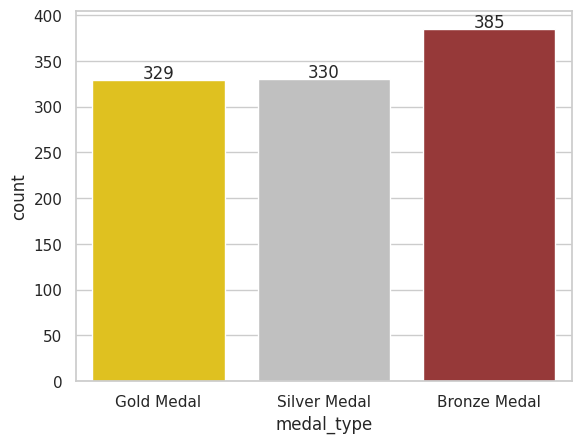

In [8]:
# Custom color palette for medals and genders
custom_palette = {
    'Gold Medal': 'gold',
    'Silver Medal': 'silver',
    'Bronze Medal': 'brown',
    'M': 'blue',  
    'W': 'pink'         
}

# Count plot of medal types
sns.set(style="whitegrid")
ax = sns.countplot(data=df_medals2, x="medal_type", palette=custom_palette)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), 
                textcoords='offset points')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

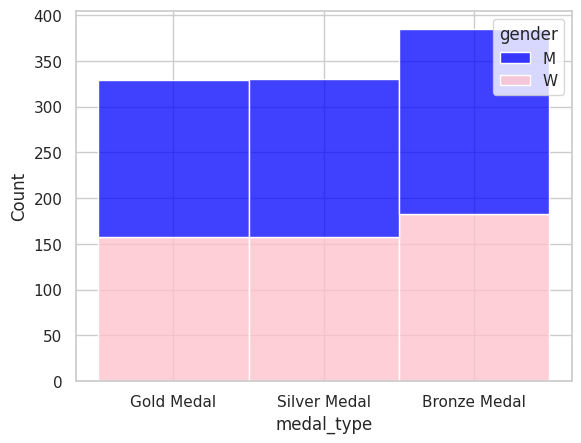

In [9]:
# Histogram of medals by gender
sns.set(style="whitegrid")
ax = sns.histplot(df_medals2, x='medal_type', hue='gender', multiple="stack", palette=custom_palette)
plt.show()

## 6. Top Countries by Medal Count

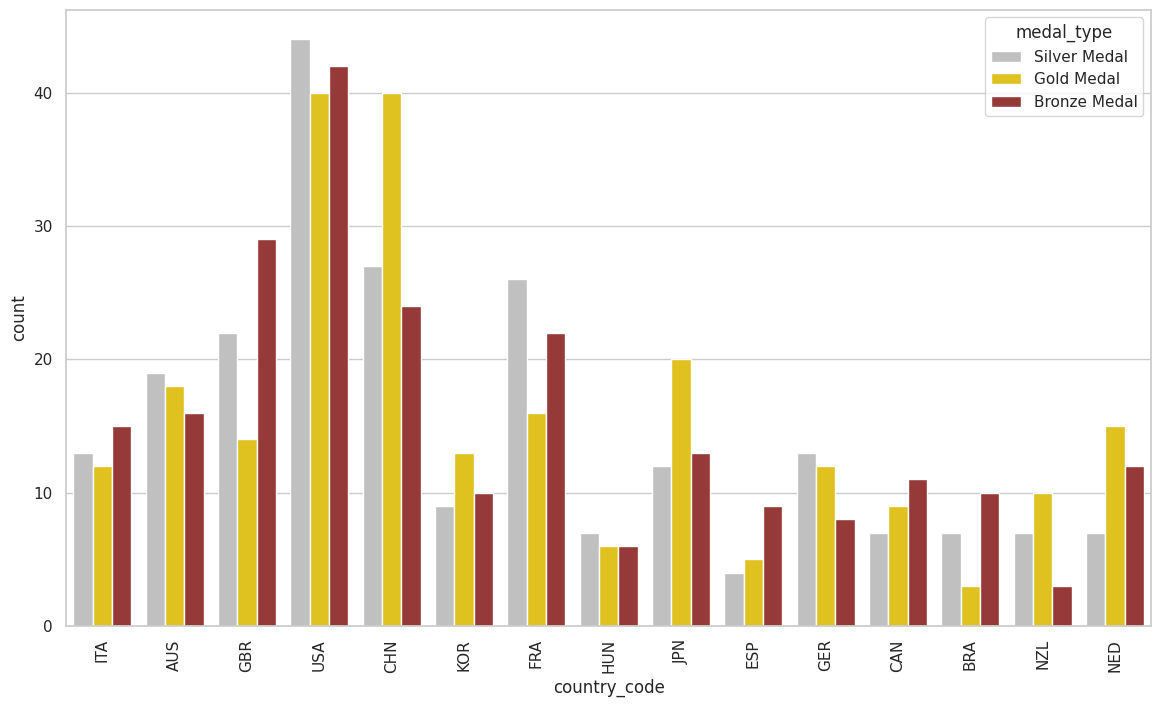

In [10]:
# Count of medals by country
country_medal_counts = df_medals2['country_code'].value_counts()
top_countries = country_medal_counts.head(15).index
df_top_countries = df_medals2[df_medals2['country_code'].isin(top_countries)]

# Count plot of medals by country and type
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))
ax = sns.countplot(data=df_top_countries, x='country_code', hue='medal_type', palette=custom_palette)
plt.xticks(rotation=90)
plt.show()

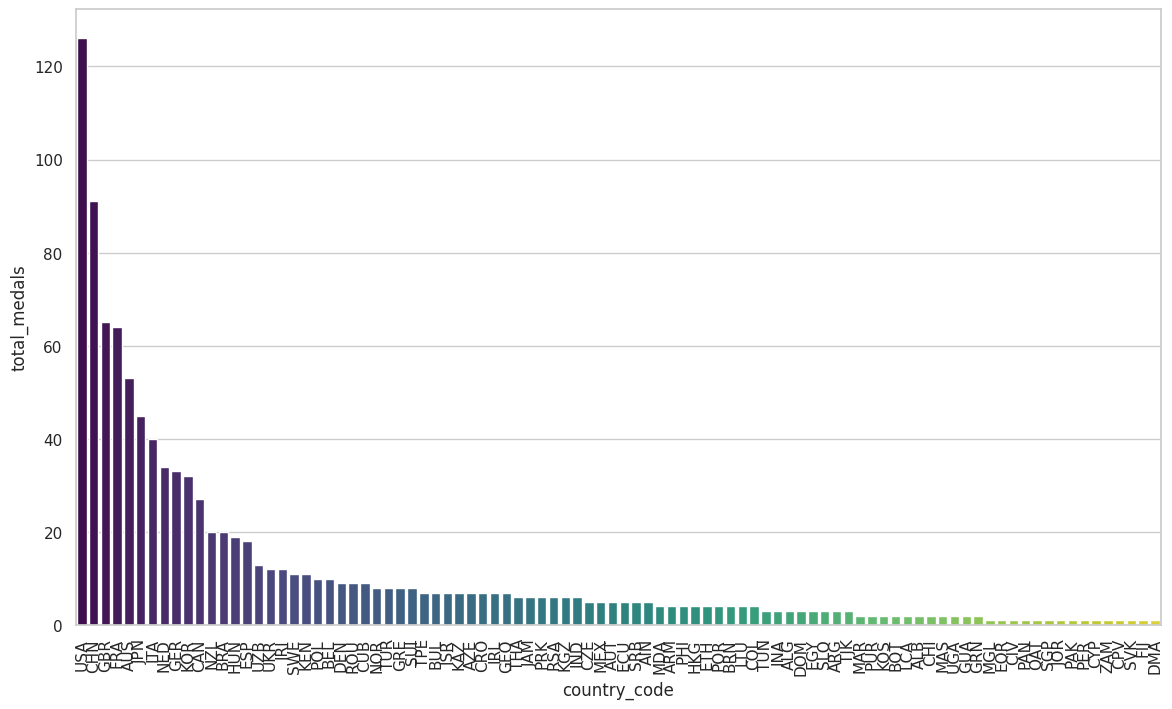

In [11]:
# Bar plot of total medals per country
total_medals_per_country = df_medals2['country_code'].value_counts().reset_index()
total_medals_per_country.columns = ['country_code', 'total_medals']
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=total_medals_per_country, x='country_code', y='total_medals', palette='viridis')
plt.xticks(rotation=90)
plt.show()

## 7. Explore Swimming Data

In [12]:
df_swimming.head()


,date,stage_code,event_code,event_name,event_stage,stage,gender,discipline_name,discipline_code,venue,...,participant_name,participant_type,participant_country_code,participant_country,rank,result,result_type,result_IRM,result_diff,start_order
0,2024-07-28T11:52:50+02:00,SWMM100MBA------------HEAT000100--,SWMM100MBA,Men's 100m Backstroke,Men's 100m Backstroke - Heat 1,Heat 1,M,Swimming,SWM,Paris La Defense Arena,...,HARVEY Jack,Person,BER,Bermuda,1.0,55.78,TIME,NaN,NaN,4
1,2024-07-28T11:52:50+02:00,SWMM100MBA------------HEAT000100--,SWMM100MBA,Men's 100m Backstroke,Men's 100m Backstroke - Heat 1,Heat 1,M,Swimming,SWM,Paris La Defense Arena,...,KPADE Alexis Michel Roger Dodji,Person,BEN,Benin,2.0,57.61,TIME,NaN,1.83,3
2,2024-07-28T11:52:50+02:00,SWMM100MBA------------HEAT000100--,SWMM100MBA,Men's 100m Backstroke,Men's 100m Backstroke - Heat 1,Heat 1,M,Swimming,SWM,Paris La Defense Arena,...,AL BAWWAB Yazan,Person,PLE,Palestine,3.0,58.26,TIME,NaN,2.48,5
3,2024-07-28T11:52:50+02:00,SWMM100MBA------------HEAT000100--,SWMM100MBA,Men's 100m Backstroke,Men's 100m Backstroke - Heat 1,Heat 1,M,Swimming,SWM,Paris La Defense Arena,...,GRESHAM Zackary,Person,GRN,Grenada,4.0,58.92,TIME,NaN,3.14,6
4,2024-07-28T11:52:50+02:00,SWMM100MBA------------HEAT000100--,SWMM100MBA,Men's 100m Backstroke,Men's 100m Backstroke - Heat 1,Heat 1,M,Swimming,SWM,Paris La Defense Arena,...,CHAN Zeke,Person,BRU,Brunei Darussalam,5.0,1:00.38,TIME,NaN,4.60,7


In [13]:
df_swimming.shape

(1654, 21)

In [14]:
df_swimming['event_name'].unique()

array(["Men's 100m Backstroke", "Men's 100m Breaststroke",
       "Men's 100m Butterfly", "Men's 100m Freestyle",
       "Men's 1500m Freestyle", "Men's 200m Backstroke",
       "Men's 200m Breaststroke", "Men's 200m Butterfly",
       "Men's 200m Freestyle", "Men's 200m Individual Medley",
       "Men's 4 x 100m Freestyle Relay", "Men's 4 x 100m Medley Relay",
       "Men's 4 x 200m Freestyle Relay", "Men's 400m Freestyle",
       "Men's 400m Individual Medley", "Men's 50m Freestyle",
       "Men's 800m Freestyle", 'Mixed 4 x 100m Medley Relay',
       "Women's 100m Backstroke", "Women's 100m Breaststroke",
       "Women's 100m Butterfly", "Women's 100m Freestyle",
       "Women's 1500m Freestyle", "Women's 200m Backstroke",
       "Women's 200m Breaststroke", "Women's 200m Butterfly",
       "Women's 200m Freestyle", "Women's 200m Individual Medley",
       "Women's 4 x 100m Freestyle Relay",
       "Women's 4 x 100m Medley Relay",
       "Women's 4 x 200m Freestyle Relay", "Women's 

## 8. Clean Swimming Data

In [15]:
# Drop unnecessary columns from swimming dataset
df_swimming2 = df_swimming.drop(['date', 'participant_code', 'stage_code', 'event_code', 'event_stage', 'stage', 'discipline_name', 'discipline_code', 'venue', 'participant_country', 'result_IRM', 'result_diff', 'result_type', 'start_order'], axis=1)
df_swimming2.head(10)

,event_name,gender,participant_name,participant_type,participant_country_code,rank,result
0,Men's 100m Backstroke,M,HARVEY Jack,Person,BER,1.0,55.78
1,Men's 100m Backstroke,M,KPADE Alexis Michel Roger Dodji,Person,BEN,2.0,57.61
2,Men's 100m Backstroke,M,AL BAWWAB Yazan,Person,PLE,3.0,58.26
3,Men's 100m Backstroke,M,GRESHAM Zackary,Person,GRN,4.0,58.92
4,Men's 100m Backstroke,M,CHAN Zeke,Person,BRU,5.0,1:00.38
5,Men's 100m Backstroke,M,UHI Alan Koti Lopeti,Person,TGA,6.0,1:00.62
6,Men's 100m Backstroke,M,WILSON Maximillian,Person,ISV,1.0,54.49
7,Men's 100m Backstroke,M,NATARAJ Srihari,Person,IND,2.0,55.01
8,Men's 100m Backstroke,M,FOLLOWS Kane,Person,NZL,2.0,55.01
9,Men's 100m Backstroke,M,REITSHAMMER Bernhard,Person,AUT,4.0,55.13


In [16]:
df_swimming2.dtypes

event_name                   object
gender                       object
participant_name             object
participant_type             object
participant_country_code     object
rank                        float64
result                       object
dtype: object

## 9. Convert Results to Seconds

In [17]:
def convert_to_seconds(time_str):
    if isinstance(time_str, float):
        return time_str
    elif ':' in time_str:
        minutes, seconds = time_str.split(':')
        return float(minutes) * 60 + float(seconds)
    else:
        return float(time_str)

# Apply conversion function
df_swimming2['result_seconds'] = df_swimming2['result'].apply(convert_to_seconds)
df_swimming2.head()

,event_name,gender,participant_name,participant_type,participant_country_code,rank,result,result_seconds
0,Men's 100m Backstroke,M,HARVEY Jack,Person,BER,1.0,55.78,55.78
1,Men's 100m Backstroke,M,KPADE Alexis Michel Roger Dodji,Person,BEN,2.0,57.61,57.61
2,Men's 100m Backstroke,M,AL BAWWAB Yazan,Person,PLE,3.0,58.26,58.26
3,Men's 100m Backstroke,M,GRESHAM Zackary,Person,GRN,4.0,58.92,58.92
4,Men's 100m Backstroke,M,CHAN Zeke,Person,BRU,5.0,1:00.38,60.38


## 10. Analyze Swimming Results

In [18]:
# Average rank and gold medal counts by country
top_countries = df_swimming.groupby('participant_country_code')['rank'].mean().sort_values()
top_countries_medals = df_swimming[df_swimming['rank'] == 1]['participant_country_code'].value_counts()
top_countries_medals

participant_country_code
USA    36
AUS    31
CHN    15
CAN    13
FRA    13
       ..
MAR     1
EST     1
BRA     1
GBS     1
THA     1
Name: count, Length: 67, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


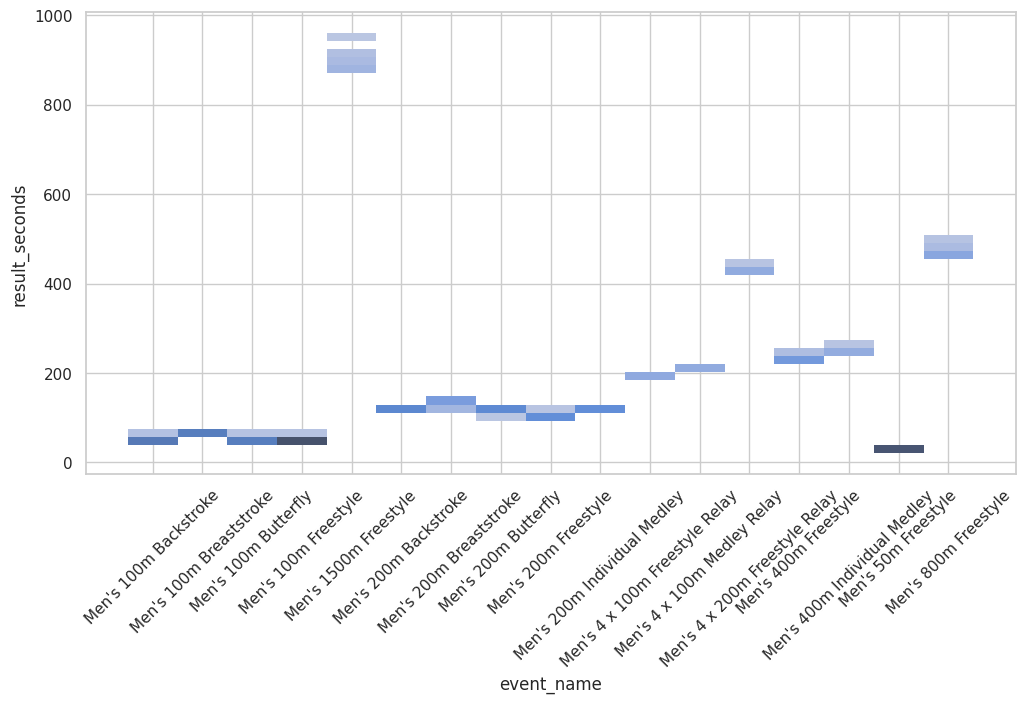

In [19]:
# Histogram of men's swimming results
df_men = df_swimming2[df_swimming['gender'].str.contains("M")]
plt.figure(figsize=(12, 6))
sns.histplot(x='event_name', y='result_seconds', data=df_men)
plt.xticks(rotation=45)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


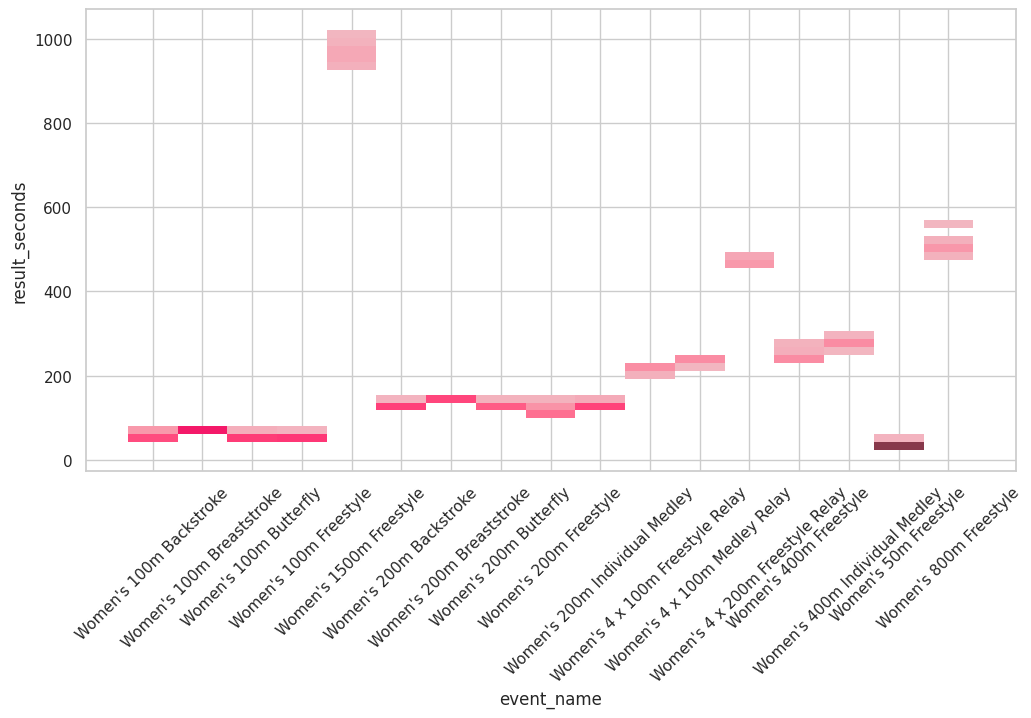

In [20]:
# Histogram of women's swimming results
df_woman = df_swimming2[df_swimming['gender'].str.contains("W")]
plt.figure(figsize=(12, 6))
sns.histplot(x='event_name', y='result_seconds', data=df_woman, color='pink')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_36/1410495149.py:7: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='gender', y='result_seconds', data=df_freestyle, jitter=True, palette='Set2')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_s

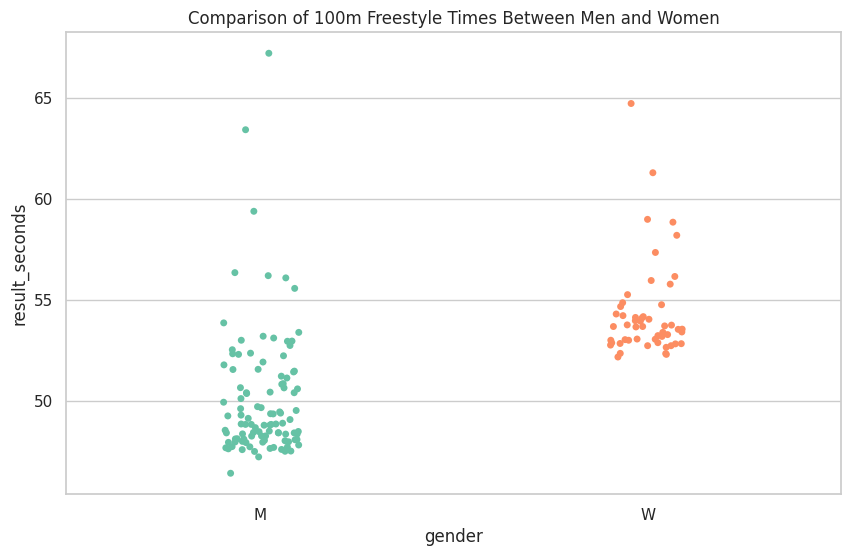

In [21]:
# Comparison of 100m Freestyle times
df_freestyle = df_swimming2[
    (df_swimming2['event_name'] == "Men's 100m Freestyle") | 
    (df_swimming2['event_name'] == "Women's 100m Freestyle")
]
plt.figure(figsize=(10, 6))
sns.stripplot(x='gender', y='result_seconds', data=df_freestyle, jitter=True, palette='Set2')
plt.title('Comparison of 100m Freestyle Times Between Men and Women')
plt.show()

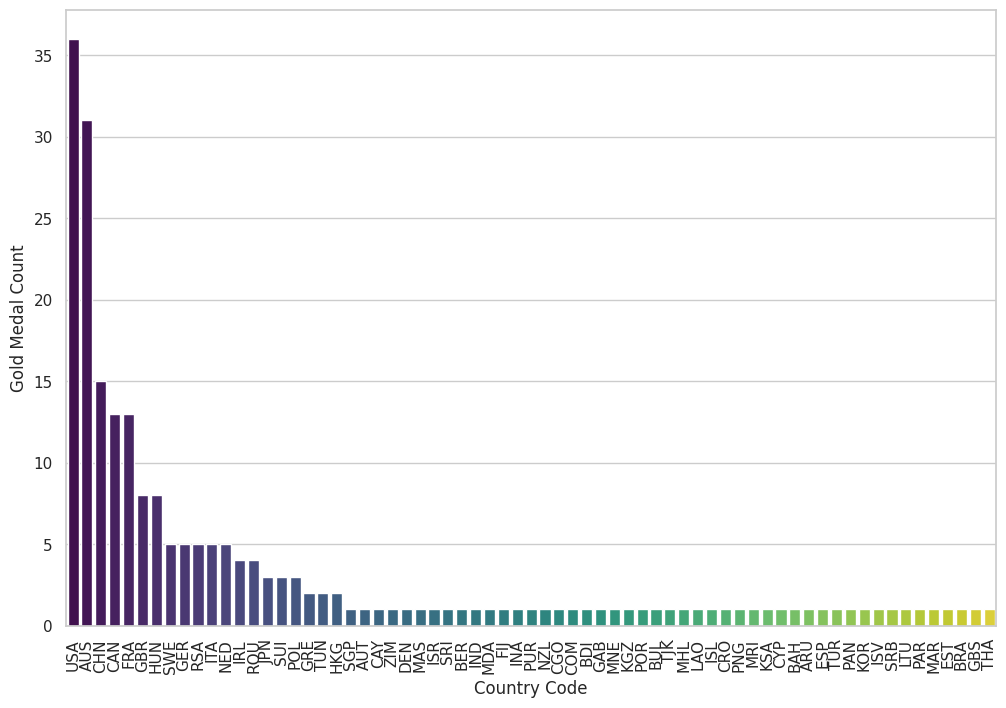

In [22]:
# Gold medal counts by country
df_gold_medals = df_swimming2[df_swimming2['rank'] == 1]
gold_medal_counts = df_gold_medals['participant_country_code'].value_counts()
gold_medal_counts_df = gold_medal_counts.reset_index()
gold_medal_counts_df.columns = ['Country Code', 'Gold Medal Count']
plt.figure(figsize=(12, 8))
sns.barplot(x='Country Code', y='Gold Medal Count', data=gold_medal_counts_df, palette='viridis')
plt.xticks(rotation=90)
plt.show()

In [23]:
# Data for Egypt
egy_data = df_swimming2[df_swimming2['participant_country_code'] == 'EGY']
egy_data

,event_name,gender,participant_name,participant_type,participant_country_code,rank,result,result_seconds
308,Men's 1500m Freestyle,M,ELKAMASH Marwan,Person,EGY,NaN,NaN,NaN
860,Men's 800m Freestyle,M,ELKAMASH Marwan,Person,EGY,8.0,8:07.00,487.00
1303,Women's 200m Freestyle,W,ABDALLA SALAH Lojine,Person,EGY,8.0,2:07.19,127.19


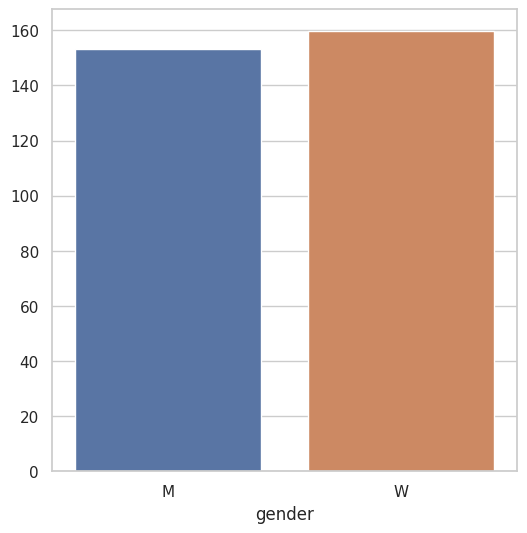

In [24]:
# Average performance by gender
filtered_data = df_swimming2[df_swimming2['gender'].isin(['M', 'W'])]
plt.figure(figsize=(6, 6))
gender_avg_performance = filtered_data.groupby('gender')['result_seconds'].mean()
sns.barplot(x=gender_avg_performance.index, y=gender_avg_performance.values)
plt.show()

In [25]:
# Filtered data for unspecified gender
filtered_data = df_swimming2[df_swimming2['gender'] == 'X']
filtered_data

,event_name,gender,participant_name,participant_type,participant_country_code,rank,result,result_seconds
869,Mixed 4 x 100m Medley Relay,X,Australia,Team,AUS,1.0,3:41.42,221.42
870,Mixed 4 x 100m Medley Relay,X,Netherlands,Team,NED,2.0,3:43.60,223.60
871,Mixed 4 x 100m Medley Relay,X,Canada,Team,CAN,3.0,3:43.87,223.87
872,Mixed 4 x 100m Medley Relay,X,Germany,Team,GER,4.0,3:44.75,224.75
873,Mixed 4 x 100m Medley Relay,X,Italy,Team,ITA,5.0,3:45.80,225.80
874,Mixed 4 x 100m Medley Relay,X,Poland,Team,POL,6.0,3:48.19,228.19
875,Mixed 4 x 100m Medley Relay,X,Republic of Korea,Team,KOR,7.0,3:48.78,228.78
876,Mixed 4 x 100m Medley Relay,X,Brazil,Team,BRA,8.0,3:57.27,237.27
877,Mixed 4 x 100m Medley Relay,X,United States of America,Team,USA,1.0,3:40.98,220.98
878,Mixed 4 x 100m Medley Relay,X,People's Republic of China,Team,CHN,2.0,3:42.26,222.26


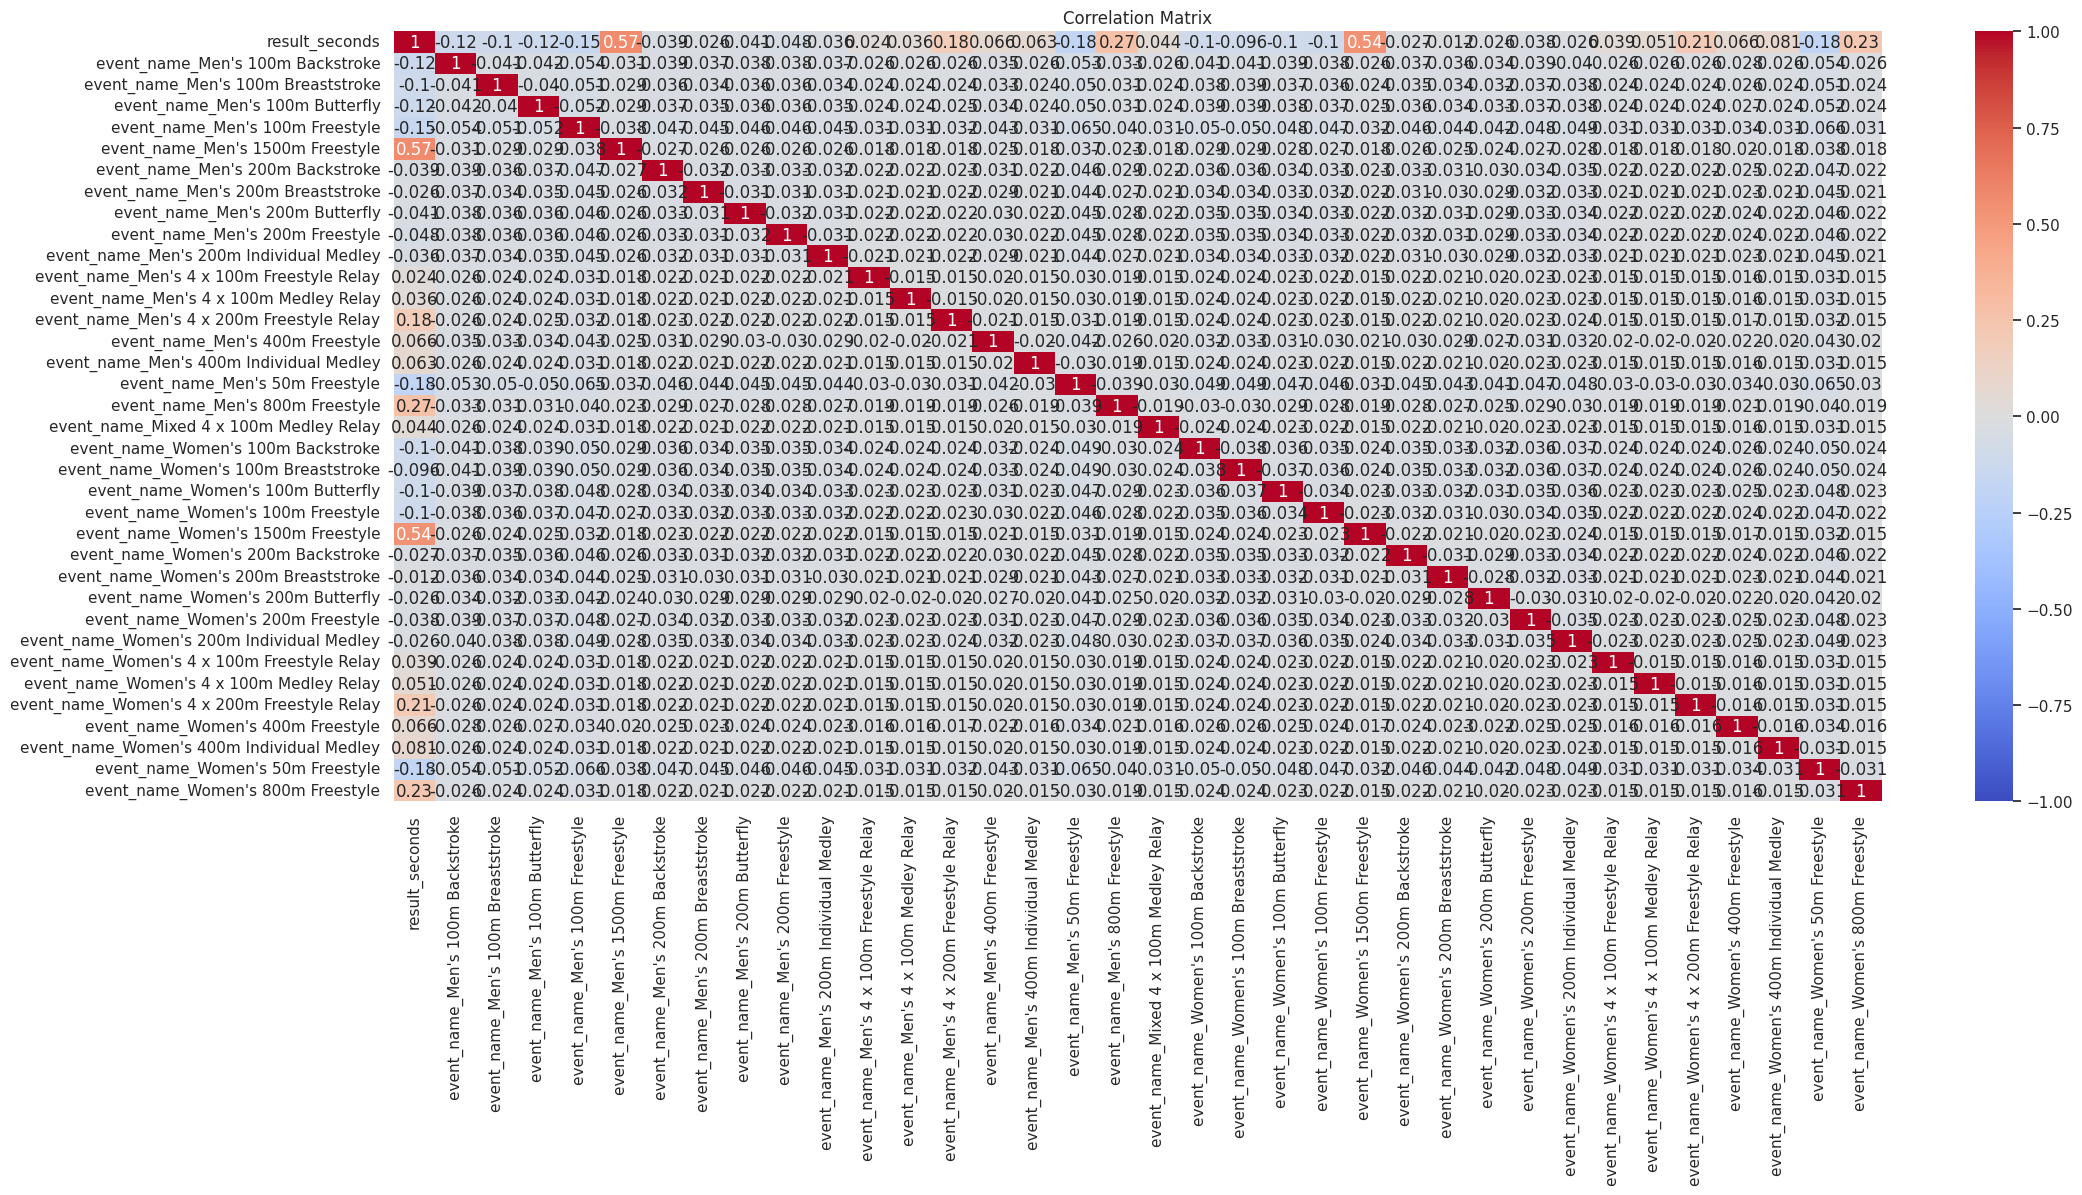

In [26]:
# Correlation matrix
correlation_data = df_swimming2[['result_seconds', 'event_name']].copy()
correlation_data = pd.get_dummies(correlation_data, columns=['event_name'])
correlation_matrix = correlation_data.corr()
plt.figure(figsize=(24, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## 11. Medal Counts by Country (Plotly)

In [27]:
fig = px.bar(df_total_medals, x='country_code', y=['Gold Medal', 'Silver Medal', 'Bronze Medal'],
             title='Medal Counts by Country')
fig.update_layout(barmode='stack')
fig.show()

In [28]:
# Interactive bar plot of total medals by country
medal_counts = df_medals2['country_code'].value_counts().reset_index()
medal_counts.columns = ['country_code', 'total_medals']

# Create bar plot
fig = px.bar(medal_counts, x='country_code', y='total_medals', 
             title='Total Medals by Country',
             labels={'total_medals': 'Number of Medals', 'country_code': 'Country Code'},
             color='total_medals', color_continuous_scale='viridis')

fig.update_layout(xaxis_title='Country Code', yaxis_title='Number of Medals', 
                  xaxis_tickangle=-45)
fig.show()

## 12. Summary Statistics for Swimming Results

In [29]:
summary_stats = df_swimming2.groupby('event_name')['result_seconds'].describe()
summary_stats

,count,mean,std,min,25%,50%,75%,max
event_name,,,,,,,,
Men's 100m Backstroke,70.0,54.084571,1.751575,52.00,52.9500,53.570,54.6250,60.62
Men's 100m Breaststroke,61.0,60.480984,2.112702,58.86,59.3200,59.690,60.3600,69.85
Men's 100m Butterfly,64.0,52.166406,2.767238,49.90,50.8100,51.515,52.2475,68.72
Men's 100m Freestyle,103.0,50.122524,3.194033,46.40,48.0950,48.880,51.3150,67.21
Men's 1500m Freestyle,32.0,895.770938,18.285954,870.67,883.9875,891.015,905.1475,960.31
Men's 200m Backstroke,52.0,117.328077,1.566161,114.26,116.3750,117.205,118.0150,121.91
Men's 200m Breaststroke,49.0,130.603061,2.731687,125.85,129.5200,130.030,130.9800,142.51
Men's 200m Butterfly,51.0,115.512549,2.329305,111.21,114.2500,115.220,116.1050,126.80
Men's 200m Freestyle,49.0,106.770612,2.301238,104.53,105.5700,106.230,107.3100,118.67


# Analysis Summary

- **Medal Distribution**: The analysis reveals the distribution of medals by type and gender. 
- **Top Countries**: We identified the top countries by total medal counts and visualized their performance.
- **Swimming Performance**: Insights into swimming results, including comparisons between men and women and analysis of 100m Freestyle times.
- **Gold Medals**: Visualization of gold medal counts by country.

These insights help us understand the performance patterns and distribution of medals in the Paris 2024 Olympics.